In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(12, 8)

sns.set()

In [3]:
market = pd.read_csv('../estaticos_market.csv')
portfolio1 = pd.read_csv('../estaticos_portfolio1.csv')
portfolio2 = pd.read_csv('../estaticos_portfolio2.csv')
portfolio3 = pd.read_csv('../estaticos_portfolio3.csv')

In [4]:
market['cliente_port1'] = market.id.isin(portfolio1.id)
market['cliente_port2'] = market.id.isin(portfolio2.id)
market['cliente_port3'] = market.id.isin(portfolio3.id)

In [5]:
features_cadastrais = [
'id',
'fl_matriz',
'de_natureza_juridica',
'sg_uf',
'idade_empresa_anos',
'idade_emp_cat',
'fl_email',
'fl_telefone',
'fl_rm',
'sg_uf_matriz',
'empsetorcensitariofaixarendapopulacao',
'nm_meso_regiao',
'nm_micro_regiao',
'cliente_port1',
'cliente_port2',
'cliente_port3']

In [6]:
market = market[features_cadastrais]

In [7]:
market.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,idade_empresa_anos,idade_emp_cat,fl_email,fl_telefone,fl_rm,sg_uf_matriz,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,cliente_port1,cliente_port2,cliente_port3
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,14.457534,10 a 15,True,True,SIM,RN,NaN,LESTE POTIGUAR,NATAL,False,False,False
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,1.463014,1 a 5,True,True,SIM,PI,468.93,CENTRO NORTE PIAUIENSE,TERESINA,False,False,False
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,7.093151,5 a 10,False,True,SIM,AM,713.50,CENTRO AMAZONENSE,MANAUS,False,False,False
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,6.512329,5 a 10,True,True,SIM,AM,475.73,CENTRO AMAZONENSE,MANAUS,False,False,False
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,3.200000,1 a 5,True,True,SIM,RN,2874.04,LESTE POTIGUAR,NATAL,False,False,False


In [8]:
market.tail()

,id,fl_matriz,de_natureza_juridica,sg_uf,idade_empresa_anos,idade_emp_cat,fl_email,fl_telefone,fl_rm,sg_uf_matriz,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,cliente_port1,cliente_port2,cliente_port3
462293,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,True,EMPRESARIO INDIVIDUAL,RN,3.254795,1 a 5,True,True,NAO,RN,585.63,AGRESTE POTIGUAR,BORBOREMA POTIGUAR,False,False,False
462294,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,True,EMPRESARIO INDIVIDUAL,PI,8.953425,5 a 10,False,False,SIM,PI,2429.89,CENTRO NORTE PIAUIENSE,TERESINA,False,False,False
462295,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,True,ASSOCIACAO PRIVADA,MA,20.745205,> 20,False,False,SIM,MA,3150.81,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,False,False,False
462296,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,True,SOCIEDADE EMPRESARIA LIMITADA,RO,1.909589,1 a 5,True,False,NAO,RO,2752.49,NaN,NaN,False,False,False
462297,3d43e934e150b86be1e67524f5ba1018b27da9ef25566d...,True,EMPRESARIO INDIVIDUAL,RO,0.797260,<= 1,True,True,NAO,RO,NaN,NaN,NaN,False,False,False


In [9]:
market.dtypes

id                                        object
fl_matriz                                   bool
de_natureza_juridica                      object
sg_uf                                     object
idade_empresa_anos                       float64
idade_emp_cat                             object
fl_email                                    bool
fl_telefone                                 bool
fl_rm                                     object
sg_uf_matriz                              object
empsetorcensitariofaixarendapopulacao    float64
nm_meso_regiao                            object
nm_micro_regiao                           object
cliente_port1                               bool
cliente_port2                               bool
cliente_port3                               bool
dtype: object

> Criando nova coluna _setor_privado_

In [ ]:
natureza_privado = ['SOCIEDADE EMPRESARIA LIMITADA', 'EMPRESARIO INDIVIDUAL', 'COOPERATIVA', 'ASSOCIACAO PRIVADA', 
'ENTIDADE SINDICAL', 'CONSORCIO DE SOCIEDADES', 'SOCIEDADE DE ECONOMIA MISTA', 'CONDOMINIO EDILICIO', 'SOCIEDADE ANONIMA ABERTA',
'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA', 'EMPRESA INDIVIDUAL IMOBILIARIA',
'SOCIEDADE SIMPLES LIMITADA', 'FUNDACAO PRIVADA', 'SOCIEDADE ANONIMA FECHADA',  'ORGANIZACAO RELIGIOSA',
'SOCIEDADE UNIPESSOAL DE ADVOCACIA', 'SOCIEDADE SIMPLES PURA', 'SOCIEDADE EMPRESARIA EM NOME COLETIVO',
'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES', 'SERVICO NOTARIAL E REGISTRAL CARTORIO', 
'ORGANIZACAO SOCIAL OS', 'CONSORCIO PUBDE DIREITO PUB ASS PUB', 'SERVICO SOCIAL AUTONOMO', 'SOCIEDADE EM CONTA DE PARTICIPACAO',
'GRUPO DE SOCIEDADES', 'SOCIEDADE MERCANTIL DE CAPITAL E INDUSTRIA', 'SOCIEDADE EMPRESARIA EM COMANDITA POR ACOES',
'ESTABELECIMENTO NO BRASIL DE SOCIEDADE ESTRANGEIRA', 'ENTIDADE DE MEDIACAO E ARBITRAGEM', 'COMUNIDADE INDIGENA',
'ESTABELECIMENTO NO BRASIL DE FUNDACAO OU ASSOCIACAO ESTRANGEIRAS','CLUBE FUNDO DE INVESTIMENTO', 'REPRESENTACAO DIPLOMATICA ESTRANGEIRA',
'SOCIEDADE SIMPLES EM COMANDITA SIMPLES', 'FRENTE PLEBISCITARIA OU REFERENDARIA', 'SOCIEDADE EMPRESARIA EM COMANDITA SIMPLES',
'CONSORCIO DE EMPREGADORES', 'SOCIEDADE SIMPLES EM NOME COLETIVO', 'FUNDO PRIVADO']

natureza_publico = ['ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL', 'MUNICIPIO', 'ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO',
'CANDIDATO A CARGO POLITICO ELETIVO', 'ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL',
'ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL', 'AUTARQUIA FEDERAL', 'ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL',
'EMPRESA PUBLICA', 'AUTARQUIA MUNICIPAL', 'FUNDO PUBLICO', 'AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL',
'FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL', 'ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL', 'ORGAO DE DIRECAO REGIONAL DE PARTIDO POLITICO',
'FUNDACAO PUBLICA DE DIREITO PRIVADO MUNICIPAL', 'ORGAO PUBLICO AUTONOMO MUNICIPAL', 'ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL',
'FUNDACAO PUBLICA DE DIREITO PUBFEDERAL', 'ORGAO PUBLICO AUTONOMO ESTADUAL OU DO DISTRITO FEDERAL', 'FUNDACAO PUB DE DIREITO PUB EST OU DO DF',
'ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL', 'FUNDACAO PUBLICA DE DIREITO PRIVADO FEFERAL',
'CONSORCIO PUBLICO DE DIREITO PRIVADO', 'ESTADO OU DISTRITO FEDERAL', 'ORGAO PUBLICO DO PODER LEGISLATIVO FEDERAL',
'ORGAO DE DIRECAO NACIONAL DE PARTIDO POLITICO']


In [78]:
market['setor_privado'] = np.where(market.de_natureza_juridica.isin(natureza_privado), True, False)

Transforma coluna fl_rm para bool

In [10]:
market.fl_rm = market.fl_rm.map({'SIM': True, 'NAO': False})

In [11]:
market.isnull().mean()

id                                       0.000000
fl_matriz                                0.000000
de_natureza_juridica                     0.000000
sg_uf                                    0.000000
idade_empresa_anos                       0.000000
idade_emp_cat                            0.000000
fl_email                                 0.000000
fl_telefone                              0.000000
fl_rm                                    0.000000
sg_uf_matriz                             0.004194
empsetorcensitariofaixarendapopulacao    0.311118
nm_meso_regiao                           0.126970
nm_micro_regiao                          0.126970
cliente_port1                            0.000000
cliente_port2                            0.000000
cliente_port3                            0.000000
dtype: float64

In [12]:
market.describe(include = ['O'])

,id,de_natureza_juridica,sg_uf,idade_emp_cat,sg_uf_matriz,nm_meso_regiao,nm_micro_regiao
count,462298,462298,462298,462298,460359,403600,403600
unique,462298,67,6,6,27,19,73
top,bf9d50195a659a58bbf79f0c555998be1945e8e33e7fd7...,EMPRESARIO INDIVIDUAL,MA,1 a 5,MA,CENTRO AMAZONENSE,MANAUS
freq,1,295756,127654,138580,124823,71469,60008


In [13]:
market.describe()

,idade_empresa_anos,empsetorcensitariofaixarendapopulacao
count,462298.000000,318469.000000
mean,9.948677,1308.005725
std,9.615664,1161.889222
min,0.016438,100.000000
25%,2.756164,673.230000
50%,6.704110,946.680000
75%,14.465753,1518.080000
max,106.432877,75093.840000


> Análise da feature _fl_matriz_

In [20]:
cliente_matriz = pd.DataFrame()
port1 = market.loc[market.cliente_port1, 'fl_matriz']
port2 = market.loc[market.cliente_port2, 'fl_matriz']
port3 = market.loc[market.cliente_port3, 'fl_matriz']


port1 = port1.to_frame()
port1.reset_index(drop=True, inplace=True)
port1['portfolio'] = 'port1'

port2 = port2.to_frame()
port2.reset_index(drop=True, inplace=True)
port2['portfolio'] = 'port2'

port3 = port3.to_frame()
port3.reset_index(drop=True, inplace=True)
port3['portfolio'] = 'port3'


cliente_matriz = pd.concat([port1, port2, port3])

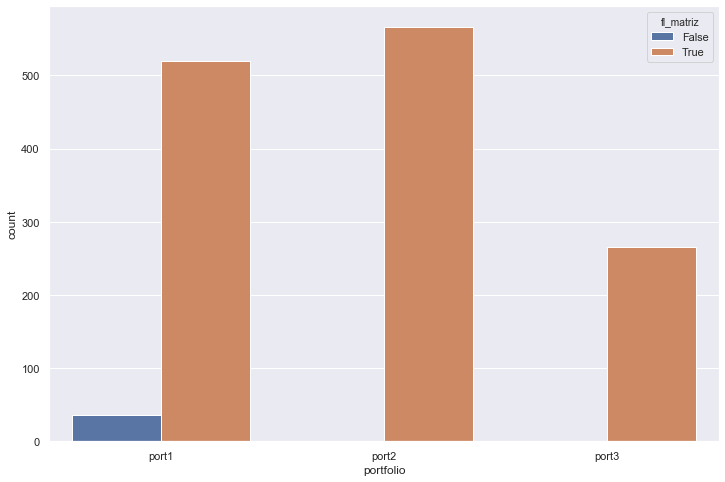

In [21]:
sns.countplot(x='portfolio', hue='fl_matriz', data=cliente_matriz)
plt.show()

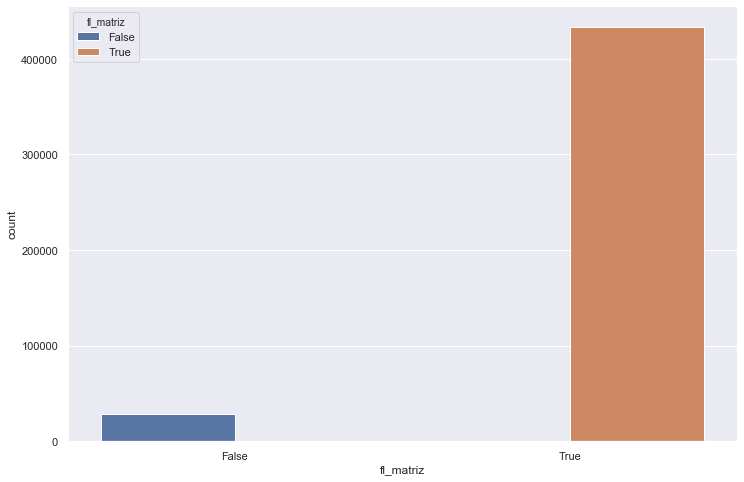

In [22]:
sns.countplot(x='fl_matriz', hue='fl_matriz', data=market)
plt.show()

> Análise da feature _de_natureza_juridica_

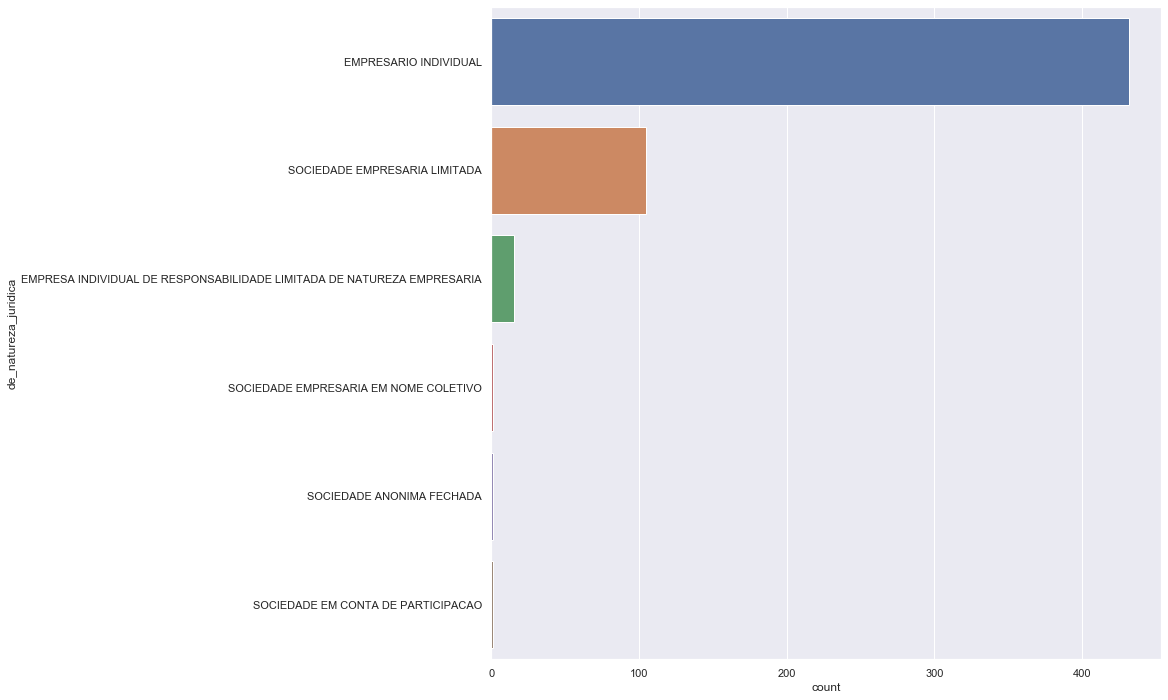

In [131]:
sns.countplot(y= 'de_natureza_juridica', data = market.loc[market.cliente_port1])
plt.show()

In [46]:
market.de_natureza_juridica.unique()

array(['SOCIEDADE EMPRESARIA LIMITADA', 'EMPRESARIO INDIVIDUAL',
       'COOPERATIVA', 'ASSOCIACAO PRIVADA', 'ENTIDADE SINDICAL',
       'CONSORCIO DE SOCIEDADES', 'SOCIEDADE DE ECONOMIA MISTA',
       'CONDOMINIO EDILICIO', 'ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL',
       'MUNICIPIO', 'ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO',
       'SOCIEDADE ANONIMA ABERTA',
       'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA',
       'CANDIDATO A CARGO POLITICO ELETIVO',
       'EMPRESA INDIVIDUAL IMOBILIARIA',
       'ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL',
       'SOCIEDADE SIMPLES LIMITADA', 'FUNDACAO PRIVADA',
       'ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL',
       'SOCIEDADE ANONIMA FECHADA', 'ORGANIZACAO RELIGIOSA',
       'SOCIEDADE UNIPESSOAL DE ADVOCACIA', 'SOCIEDADE SIMPLES PURA',
       'AUTARQUIA FEDERAL', 'ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL',
       'EMPRESA PUBLICA', 'SOCIEDADE EMPRESARIA EM NOME COLETIVO',
      

In [72]:
group_natureza = market.groupby(['de_natureza_juridica']).size().reset_index(name='counts')
group_natureza.sort_values('counts', ascending=False)

,de_natureza_juridica,counts
17,EMPRESARIO INDIVIDUAL,295756
60,SOCIEDADE EMPRESARIA LIMITADA,91231
0,ASSOCIACAO PRIVADA,29694
13,EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITAD...,15183
37,ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO,7301
...,...,...
8,CONSORCIO DE EMPREGADORES,1
11,CONSORCIO PUBLICO DE DIREITO PRIVADO,1
30,FUNDO PRIVADO,1
38,ORGAO DE DIRECAO NACIONAL DE PARTIDO POLITICO,1


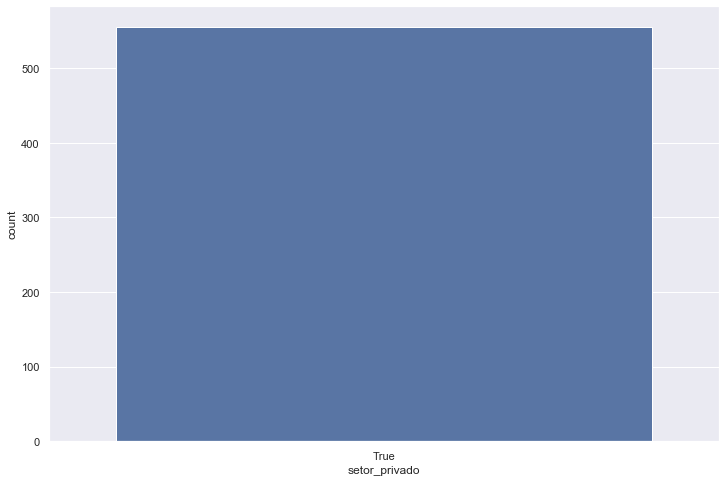

In [77]:
sns.countplot(x='setor_privado', data = market.loc[market.cliente_port1])
plt.show()

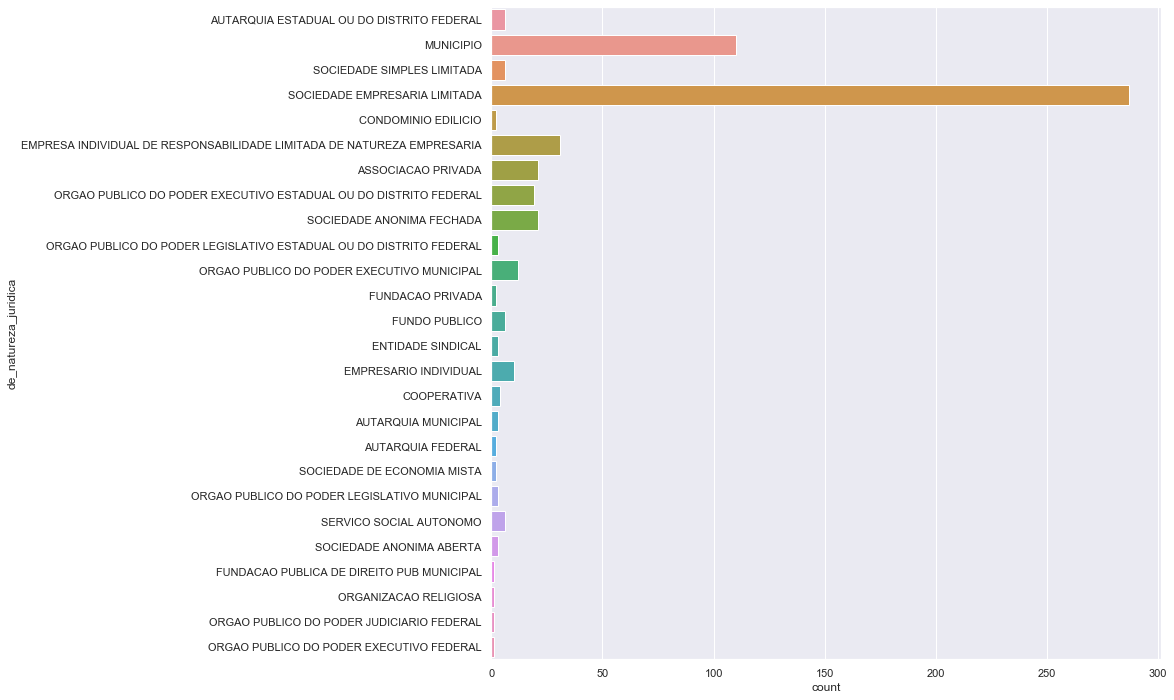

In [130]:
sns.countplot(y='de_natureza_juridica', data = market.loc[market.cliente_port2])
plt.show()

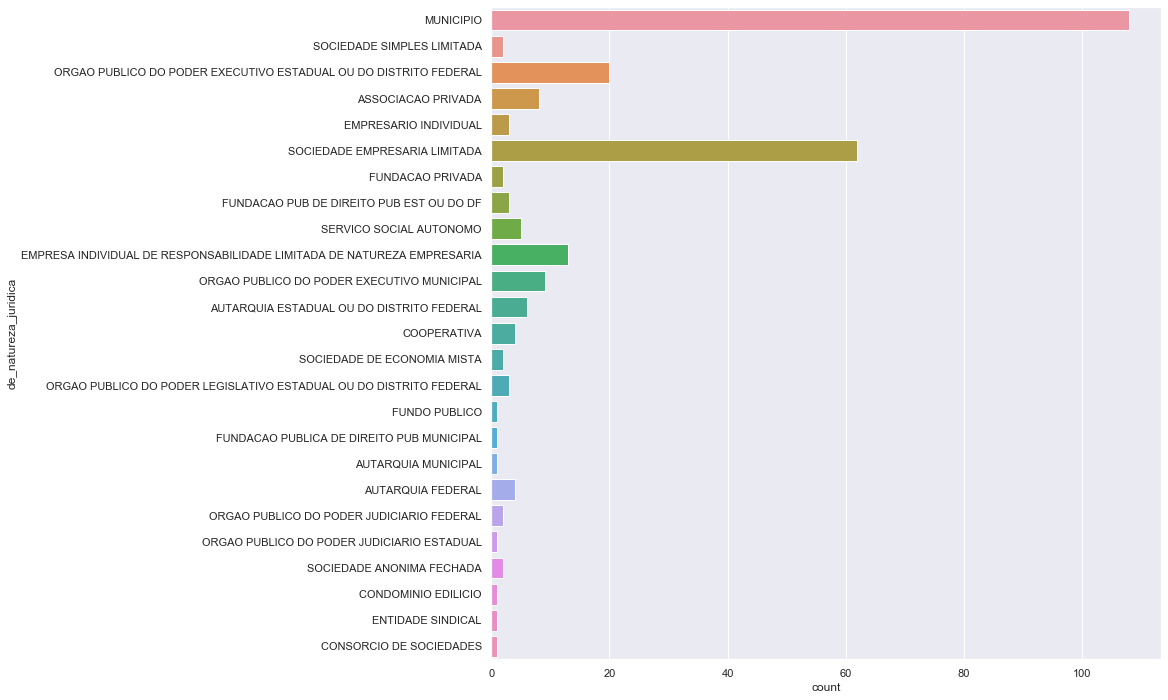

In [132]:
sns.countplot(y='de_natureza_juridica', data = market.loc[market.cliente_port3])
plt.show()

> Análise das features _sg_uf_ e sg_uf_matriz

In [75]:
group_uf_matriz = market.groupby(['sg_uf_matriz']).size().reset_index(name='counts')
group_uf_matriz.sort_values('counts', ascending=False)

,sg_uf_matriz,counts
9,MA,124823
19,RN,96743
2,AM,80032
16,PI,75201
20,RO,54876
0,AC,20028
25,SP,2845
6,DF,1225
5,CE,927
18,RJ,669


In [23]:
print("Estados - {} - total {}".format(market.sg_uf.unique(), len(market.sg_uf.unique())))
print("Estados da Matriz - {} - total {}".format(market.sg_uf_matriz.unique(), len(market.sg_uf_matriz.unique())))

Estados - ['RN' 'PI' 'AM' 'MA' 'RO' 'AC'] - total 6
Estados da Matriz - ['RN' 'PI' 'AM' 'MA' 'RO' 'AC' 'DF' nan 'CE' 'PB' 'SP' 'PR' 'ES' 'PE' 'MG'
 'RJ' 'RS' 'GO' 'SC' 'BA' 'MT' 'MS' 'PA' 'RR' 'TO' 'AP' 'SE' 'AL'] - total 28


In [46]:
estados_port1 = sorted(market.loc[market.cliente_port1, 'sg_uf'].unique().tolist())
estados_port2 = sorted(market.loc[market.cliente_port2, 'sg_uf'].unique().tolist())
estados_port3 = sorted(market.loc[market.cliente_port3, 'sg_uf'].unique().tolist())
print(estados_port1)
print(estados_port2)
print(estados_port3)

['AC', 'AM', 'MA', 'PI', 'RN', 'RO']
['AC', 'AM', 'MA', 'PI', 'RN', 'RO']
['AC', 'AM', 'MA', 'PI', 'RN', 'RO']


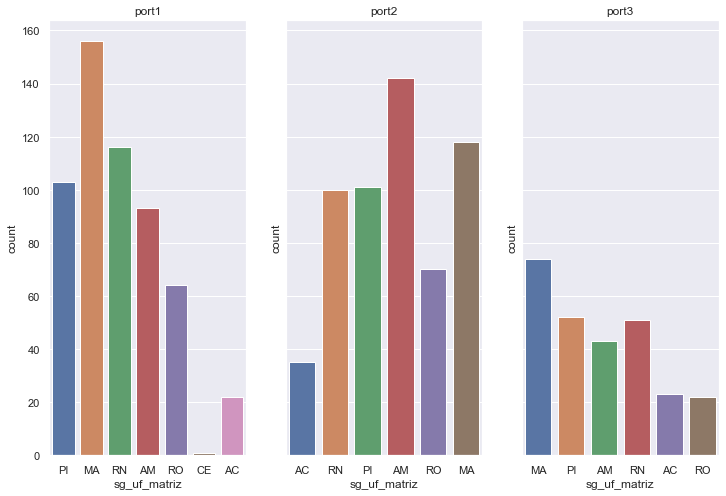

In [43]:
fig, ax =plt.subplots(1,3, sharey=True)

sns.countplot(x='sg_uf_matriz', data = market.loc[market.cliente_port1], ax=ax[0])
sns.countplot(x='sg_uf_matriz', data = market.loc[market.cliente_port2], ax=ax[1])
sns.countplot(x='sg_uf_matriz', data = market.loc[market.cliente_port3], ax=ax[2])
ax[0].set_title('port1')
ax[1].set_title('port2')
ax[2].set_title('port3')
plt.show()

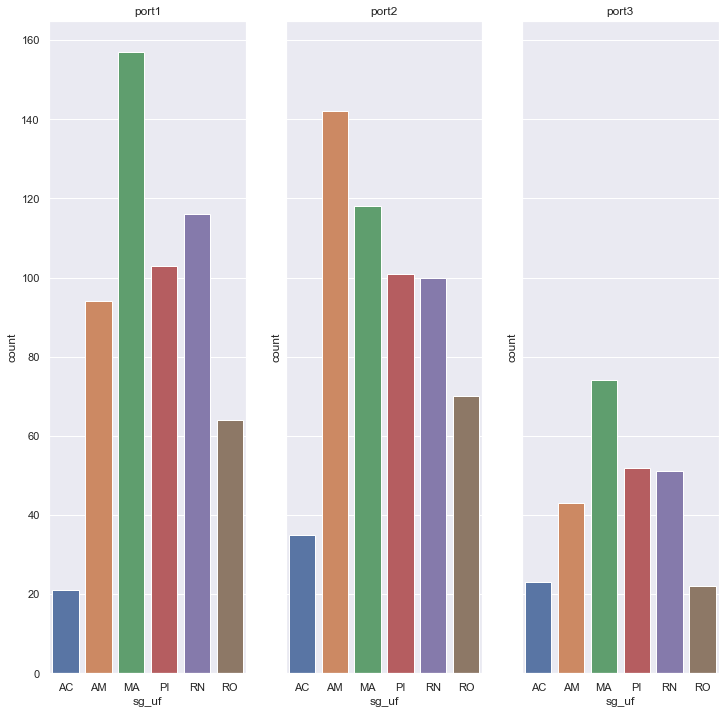

In [129]:
fig, ax =plt.subplots(1,3, sharey=True)

sns.countplot(x='sg_uf', order=estados_port1, data = market.loc[market.cliente_port1], ax=ax[0])
sns.countplot(x='sg_uf', order=estados_port2, data = market.loc[market.cliente_port2], ax=ax[1])
sns.countplot(x='sg_uf', order=estados_port3, data = market.loc[market.cliente_port3], ax=ax[2])
ax[0].set_title('port1')
ax[1].set_title('port2')
ax[2].set_title('port3')
plt.show()

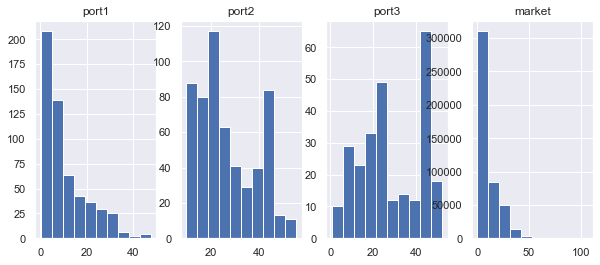

In [15]:
fig, ax =plt.subplots(1,4)
ax[0].set_title('port1')
ax[1].set_title('port2')
ax[2].set_title('port3')
ax[3].set_title('market')
market.loc[market.cliente_port1, 'idade_empresa_anos'].hist(figsize=(10, 4), ax=ax[0])
market.loc[market.cliente_port2, 'idade_empresa_anos'].hist(figsize=(10, 4), ax=ax[1])
market.loc[market.cliente_port3, 'idade_empresa_anos'].hist(figsize=(10, 4), ax=ax[2])
market.loc[~market.cliente_port1, 'idade_empresa_anos'].hist(figsize=(10, 4), ax=ax[3])
plt.show()

In [84]:
print('port1', market.loc[market.cliente_port1, 'idade_emp_cat'].unique().tolist())
print('port2', market.loc[market.cliente_port2, 'idade_emp_cat'].unique().tolist())
print('port3', market.loc[market.cliente_port3, 'idade_emp_cat'].unique().tolist())

port1 ['<= 1', '5 a 10', '> 20', '15 a 20', '1 a 5', '10 a 15']
port2 ['10 a 15', '> 20', '15 a 20']
port3 ['> 20', '15 a 20', '5 a 10', '10 a 15', '1 a 5', '<= 1']


In [24]:
order_idade_emp_cat_port1 = ['<= 1', '1 a 5', '5 a 10', '10 a 15', '15 a 20', '> 20']
order_idade_emp_cat_port2 = ['10 a 15', '15 a 20', '> 20']
order_idade_emp_cat_port3 = ['<= 1', '1 a 5', '5 a 10', '10 a 15', '15 a 20', '> 20']

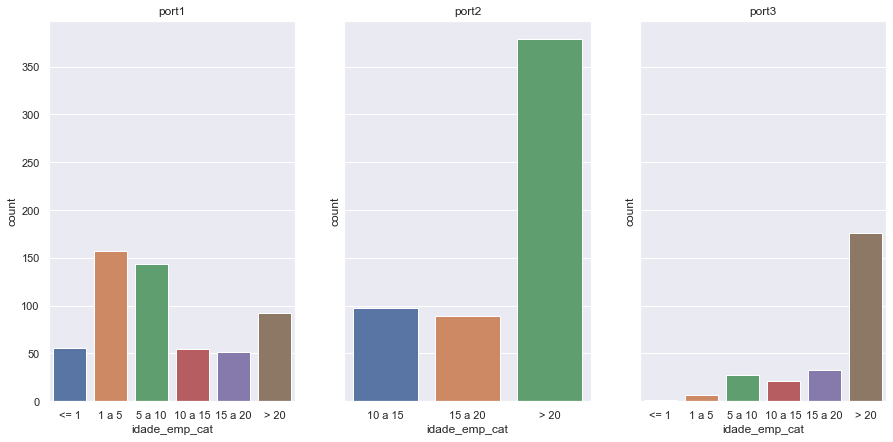

In [145]:
fig, ax =plt.subplots(1,3, sharey=True)
sns.countplot(x='idade_emp_cat', order = order_idade_emp_cat_port1, data = market.loc[market.cliente_port1], ax=ax[0])
sns.countplot(x='idade_emp_cat', order = order_idade_emp_cat_port2, data = market.loc[market.cliente_port2], ax=ax[1])
sns.countplot(x='idade_emp_cat', order = order_idade_emp_cat_port3, data = market.loc[market.cliente_port3], ax=ax[2])
ax[0].set_title('port1')
ax[1].set_title('port2')
ax[2].set_title('port3')
fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.show()

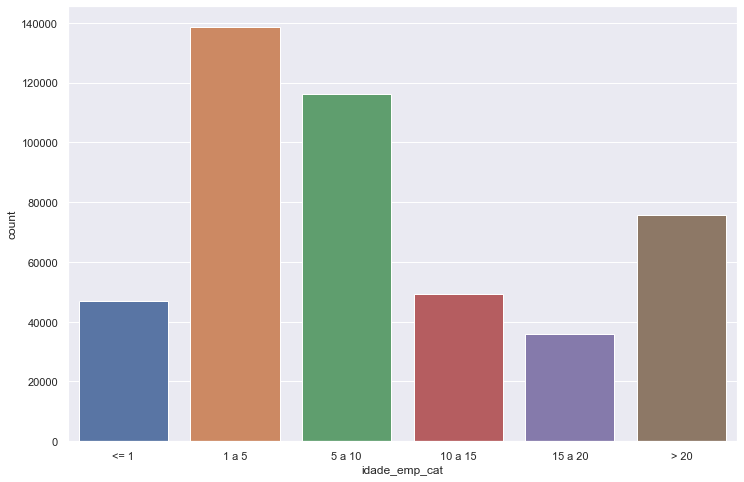

In [25]:
sns.countplot(x='idade_emp_cat', order = order_idade_emp_cat_port1, data = market)
plt.show()

In [39]:
port1_nm_meso_regiao = market.loc[market.cliente_port1, 'nm_meso_regiao'].unique()
port2_nm_meso_regiao = market.loc[market.cliente_port2, 'nm_meso_regiao'].unique()
port3_nm_meso_regiao = market.loc[market.cliente_port3, 'nm_meso_regiao'].unique()

print(port1_nm_meso_regiao[~np.isin(port1_nm_meso_regiao, port2_nm_meso_regiao)])
print(port1_nm_meso_regiao[~np.isin(port1_nm_meso_regiao, port3_nm_meso_regiao)])

print(port2_nm_meso_regiao[~np.isin(port2_nm_meso_regiao, port1_nm_meso_regiao)])
print(port2_nm_meso_regiao[~np.isin(port2_nm_meso_regiao, port3_nm_meso_regiao)])

print(port3_nm_meso_regiao[~np.isin(port3_nm_meso_regiao, port1_nm_meso_regiao)])
print(port3_nm_meso_regiao[~np.isin(port3_nm_meso_regiao, port2_nm_meso_regiao)])

[nan 'SUL AMAZONENSE']
[nan]
[nan]
[nan]
[nan]
[nan 'SUL AMAZONENSE']


In [40]:
port1_nm_micro_regiao = market.loc[market.cliente_port1, 'nm_micro_regiao'].unique()
port2_nm_micro_regiao = market.loc[market.cliente_port2, 'nm_micro_regiao'].unique()
port3_nm_micro_regiao = market.loc[market.cliente_port3, 'nm_micro_regiao'].unique()

print(port1_nm_micro_regiao[~np.isin(port1_nm_micro_regiao, port2_nm_micro_regiao)])
print(port1_nm_micro_regiao[~np.isin(port1_nm_micro_regiao, port3_nm_micro_regiao)])

print(port2_nm_micro_regiao[~np.isin(port2_nm_micro_regiao, port1_nm_micro_regiao)])
print(port2_nm_micro_regiao[~np.isin(port2_nm_micro_regiao, port3_nm_micro_regiao)])

print(port3_nm_micro_regiao[~np.isin(port3_nm_micro_regiao, port1_nm_micro_regiao)])
print(port3_nm_micro_regiao[~np.isin(port3_nm_micro_regiao, port2_nm_micro_regiao)])

[nan 'LENCOIS MARANHENSES' 'LITORAL NORDESTE' 'CHAPADINHA' 'JURUA'
 'SENA MADUREIRA' 'MACAU' 'ANGICOS' 'MADEIRA' 'BOCA DO ACRE']
[nan 'CHAPADAS DO EXTREMO SUL PIAUIENSE' 'ITACOATIARA' 'CHAPADINHA' 'CODO'
 'MACAU' 'MADEIRA' 'ALTO PARNAIBA PIAUIENSE' 'CHAPADA DO APODI'
 'PARINTINS' 'BOCA DO ACRE' 'BRASILEIA' 'TEFE']
[nan 'ROSARIO' 'CRUZEIRO DO SUL' 'RIO PRETO DA EVA']
[nan 'TEFE' 'ALTO PARNAIBA PIAUIENSE' 'ITACOATIARA' 'ROSARIO'
 'CRUZEIRO DO SUL' 'BRASILEIA' 'CHAPADA DO APODI' 'CODO' 'PARINTINS'
 'RIO PRETO DA EVA' 'CHAPADAS DO EXTREMO SUL PIAUIENSE']
[nan 'MEDIO OESTE' 'PURUS']
[nan 'MEDIO OESTE' 'LENCOIS MARANHENSES' 'SENA MADUREIRA' 'JURUA' 'PURUS'
 'LITORAL NORDESTE' 'ANGICOS']


In [42]:
len(market.nm_micro_regiao.unique().tolist())

74